# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [2]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [4]:
# implement Linear Regression
def biasing(x):
    return np.c_[np.ones(len(x)),x]
def cost_func(y,y_pred):
    sr=np.square(y-y_pred)
    return np.mean(sr)/2
def gradient_descent(x,y,learning_rate,epochs):
    cost=[]
    epoch=[]
    x_bias=biasing(np.mat(x))
    w=np.mat(np.zeros(x_bias.shape[1])).T
    y=np.mat(y).T
    for e in range(epochs):
        y_pred=np.matmul(x_bias,w)
        gradient=-1*(np.matmul(x_bias.T,(y-y_pred))/len(x_bias))
        w=w-learning_rate*gradient
        epoch.append(e+1)
        cost.append(cost_func(y,y_pred))
    return w,epoch,cost      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


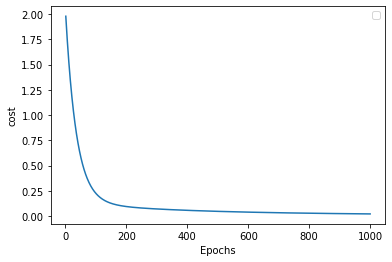

In [13]:
weights,epochs,cost=gradient_descent(x_train,y_train,0.01,100)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.plot(epochs,cost)
plt.legend()
plt.show()

In [42]:
#linear regression
def linear_regression(x_train,y_train,x_test,learning_rate=1e-1,epochs=1000):
    w_parameters,epoch,cost=gradient_descent(x_train,y_train,learning_rate,epochs)
    x=x_bias=biasing(np.mat(x_test))
    y_test=np.matmul(x,w_parameters)
    return y_test.tolist()

In [43]:
y_pred=linear_regression(x_train,y_train,x_test)

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

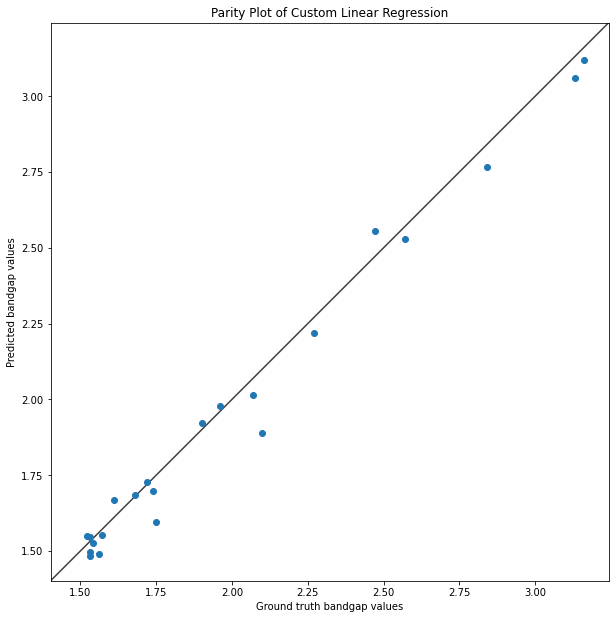

In [44]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [47]:
# you should not have imported sklearn before this point
import sklearn
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
rmses=[]
for a in alphas:
    model=Ridge(alpha=a)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmses.append(rmse)
df=pd.DataFrame(list(zip(alphas,rmses)),columns=['alpha','RMSE'])
df

,alpha,RMSE
0,1.000000e-15,0.070950
1,1.000000e-10,0.070950
2,1.000000e-08,0.070950
3,1.000000e-04,0.070951
4,1.000000e-03,0.070959
5,1.000000e-02,0.071054
6,1.000000e+00,0.110372
7,5.000000e+00,0.241104
8,1.000000e+01,0.314115
9,2.000000e+01,0.381125


### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [13]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`